gradiente descendiente
vector theta
[-0.03549815 -0.29331196 -0.38205392 -0.1057975   0.5767906 ]
costo error
0.36492885939144987


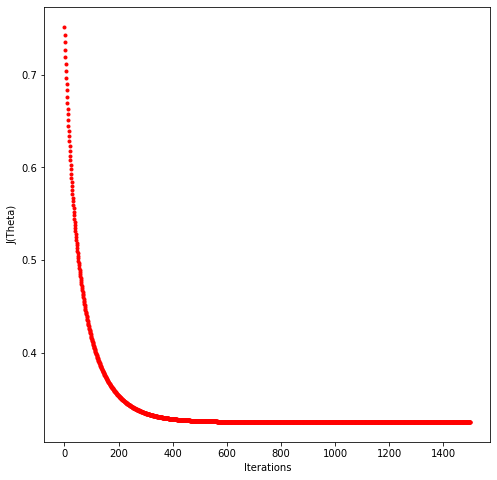

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1er tarea 
# X_train = pd.read_csv('train_ex1data1.csv')
# y_train = pd.read_csv('y_train_ex1data1.csv')
# X_test  = pd.read_csv('test_ex1data1.csv')
# y_test  = pd.read_csv('y_test_ex1data1.csv')


# X_train = X_train.iloc[:,:]
# y_train = y_train.iloc[:,0]
# X_test  = X_test.iloc[:,:]
# y_test  = y_test.iloc[:,0]

#2da tarea
X_train = pd.read_csv('file_train_petrol.csv')
y_train = pd.read_csv('file_train_petrol.csv')
X_test  = pd.read_csv('file_test_petrol.csv')
y_test  = pd.read_csv('file_test_petrol.csv')


X_train = X_train.iloc[:,1:5]
y_train = y_train.iloc[:,-1]
X_test = X_test.iloc[:,1:5]
y_test = y_test.iloc[:,-1]

#data = pd.read_csv('petrol_consumption.csv')
#msk = np.random.rand(len(data)) < 0.8
#train = data[msk]
#test = data[~msk]

#X_train = train.iloc[:, train.columns != 'Petrol_Consumption']
#y_train = train.iloc[:,-1]

#X_test = test.iloc[:, test.columns != 'Petrol_Consumption']
#y_test = test.iloc[:,-1]

n_exa_train =len(y_train)
n_exa_test =len(y_test)


X_media=np.concatenate((X_train,X_test),axis=0).mean(axis=0)
X_std=np.concatenate((X_train,X_test),axis=0).std(axis=0)
y_media=np.concatenate((y_train,y_test),axis=0).mean()
y_std=np.concatenate((y_train,y_test),axis=0).std()

X_train = (X_train - X_media)/X_std
y_train = (y_train - y_media)/y_std
X_test = (X_test - X_media)/X_std
y_test = (y_test - y_media)/y_std

X_train  = np.concatenate((np.ones([n_exa_train,1]),X_train ), axis=1)
X_test = np.concatenate((np.ones([n_exa_test,1]),X_test ), axis=1)
n_features = X_train.shape[1]


def predict(theta, data):
    return np.dot(data, theta)

alpha = 0.01
iters = 1500
theta = np.zeros([X_train.shape[1],])
#
# print(X_train)
# print(np.dot(X_train, np.zeros([2, 1])))

#print(Y_train.shape[0])
def cal_cost(theta, X, y):
    y_pred_test = predict(theta, X)
    to_sum = (y_pred_test - y) ** 2
    return np.sum(to_sum) / (X.shape[0])


def gradient_descent(X,y,theta):
    cost_history = np.zeros(iters)
    for it in range(iters):
        H_theta = predict(theta, X)
        theta = theta -(1/H_theta.shape[0])*alpha*( X.T.dot((H_theta - y)))
        cost_history[it]  = cal_cost(theta,X,y)

    return theta, cost_history


theta, cost_history = gradient_descent(X_train, y_train, theta)
cost = cal_cost(theta,X_test, y_test)

def plot():
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_ylabel('J(Theta)')
    ax.set_xlabel('Iterations')
    _ = ax.plot(range(iters), cost_history, 'r.')
    plt.show()

print("gradiente descendiente")
print("vector theta")
print(theta)
print("costo error")
print(cost)
plot()
# inicializar con un vector de ceros.

    #theta = np.dot(np.dot(np.linalg.inv()))
#quad_error = ()
if n_features==2: # este ploteo solo funciona cuando el conjunto de datos tiene dos características
    plt.subplot(2,1,2)
    plt.scatter(X_train[:,1], y_train, s=10) # esto solo está ploteando los datos del conjunto de entremaniento. 
                                             # es solo para saber si la línea encontrada se ajusta a la distribución de 
                                             # los datos de entrenamiento
    linea = np.arange(np.min(X_train[:,1]-1), np.max(X_train[:,1]+1))
    linea = np.column_stack((np.ones(linea.shape[0]),linea))
    plt.plot(linea[:,1], predict(theta,linea), c="green")
    plt.xlabel('X_1')
    plt.ylabel('y')
    cadena ="Recta: y = X_1 * " + str(round(theta[1],2)) + " +  " + str(round(theta[0],2))
    plt.text(0.5, 0.5, cadena, horizontalalignment='left', verticalalignment='center',)

plt.show()